In [1]:
from sound_processing.features_extraction import extract_mfcc_features
from features import mfcc
import sound_processing.io_sound
import pylab
import pandas as pd

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
#from matplotlib import gridspec
import matplotlib.gridspec as gridspec
def test_plot(wav_filename, color='coolwarm'):
    win_len = 0.0232
    win_overlap = 0.5
    #win_overlap = 1.0

    n_mel_bands = 40
    n_coefs = 25
    nfft = 1024
    win_step = win_len * win_overlap # 50%

    data, fs = sound_processing.io_sound.load_sound(wav_filename)
    if len(data.shape) > 1:
        signal = data[:,0]
    else:
        signal = data
    print("signal shape is %s" % signal.shape)

    window_block = fs * 1. # 1 second
    signal = signal[0:min(signal.shape[0], window_block)]  # crop a 1 sec
    #fig, ax = pylab.subplots(figsize=(18, 2))

    res = mfcc(signal, samplerate=fs, winlen=win_len, winstep = win_step, nfilt = n_mel_bands, lowfreq=0, highfreq = 22050, numcep=n_coefs, nfft=nfft)
    
    
    #pylab.figure()
    #f, axarr = plt.subplots(1, 2, sharey=True)
    #axarr = [pylab.subplot(gs[0]), pylab.subplot(gs[1])]
    features = extract_mfcc_features(signal, win_len=win_len, win_overlap=win_overlap, n_mel_bands=n_mel_bands, n_coefs=n_coefs, fs=fs, nfft=nfft)
    #im = pylab.imshow(res.T, interpolation='None')
    #im.set_cmap(color)
    #pylab.gca().set_aspect('auto')
    #pylab.gca().set_xlim(150)
    #pylab.show()
    #print(features.shape)
    #axarr[1].imshow(features)
    #pylab.gcf().suptitle('{} {}Hz'.format(wav_filename, str(fs)), fontsize=10)
    #ax = pylab.gca()
    #ax.set_aspect('auto')
    #f.savefig('/tmp/out.png')
    # ploting features 
    df = pd.DataFrame(features)

    normalised_features = df.apply(lambda x: (x - df.mean(axis=0)) / (df.max(axis=0) - df.min(axis=0)), axis=1) # - df.mean(axis=0)
    #im = pylab.imshow(normalised_features, interpolation='None')
    #im.set_cmap(color)
    #pylab.gca().set_xticks(range(len(df.columns)))
    #aticks = [u'kurt', u'max', u'mean', u'mean_d1', u'mean_d2', u'median', u'min', u'skew', u'var_d2', u'var', u'var_d1']
    #print(df.columns)
    #pylab.gca().set_xticklabels(aticks)

    #zed = [tick.label.set_fontsize(8) for tick in axarr[1].xaxis.get_major_ticks()]
    #pylab.gcf().xticks(rotation=90)
    #pylab.show()
    return res, normalised_features


In [3]:
res_fire, feat1 = test_plot("/mnt/protolab_innov/data/sounds/dataset/FireAlarmFr/FireAlarmFr-001-PepperLaurent.wav")
res_fire.shape
res_marcas, feat2 = test_plot("/mnt/protolab_innov/data/sounds/dataset_demo/ToyMaracas/ToyMaracas-001-PepperAlex.wav")
res_marcas.shape
#res_fire, feat1 = test_plot("/mnt/protolab_innov/data/sounds/dataset/FireAlarmFr/FireAlarmFr-001-PepperLaurent.wav")
res_bell, feat3 = test_plot("/mnt/protolab_innov/data/sounds/dataset_demo/DeskBell/DeskBell-001-PepperLaurent.wav")
res_bell.shape


signal shape is 71192
signal shape is 22350
signal shape is 78016


(86, 25)

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


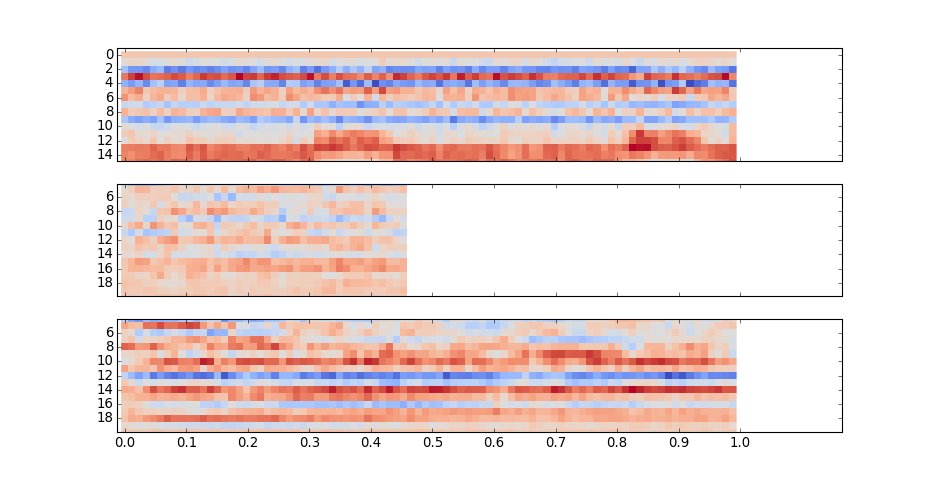

In [4]:
%pylab notebook
f, axarr = pylab.subplots(3,1, sharex=True)
axarr[0].imshow(res_fire.T, interpolation='None', cmap='coolwarm')
axarr[1].imshow(res_marcas.T, interpolation='None', cmap='coolwarm')
axarr[2].imshow(res_bell.T, interpolation='None', cmap='coolwarm')
max_len = 43*2 
pylab.gca().set_xticks(np.linspace(0, max_len , 11))
pylab.gca().set_xticklabels(np.linspace(0,1,11))
pylab.savefig('/tmp/mfcc2.png', dpi = 600)
#pylab.imshow(res_fire.T, interpolation='None', cmap='coolwarm')

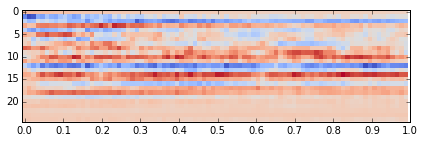

In [37]:
pylab.figure()
pylab.imshow(res_bell.T, interpolation='None', cmap='coolwarm')
max_len = 43*2 
pylab.gca().set_xticks(np.linspace(0, max_len , 11))
pylab.gca().set_xticklabels(np.linspace(0,1,11))
#pylab.gca().set_xticklabels([])

pylab.tight_layout()
pylab.savefig('/tmp/final/mfcc_bell.png', dpi=600)

pylab.show()

<IPython.core.display.Javascript object>


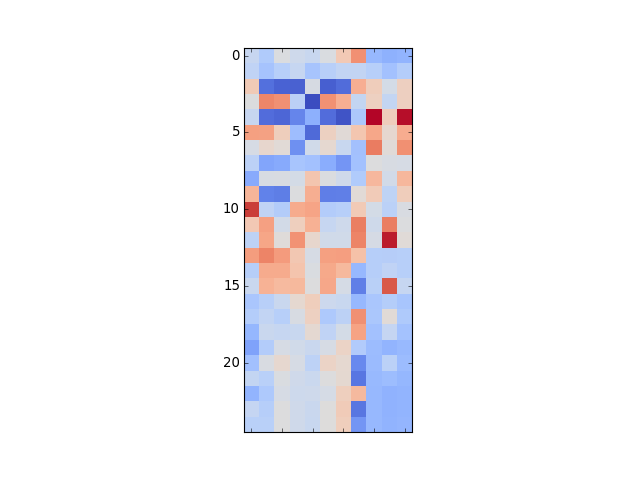

<IPython.core.display.Javascript object>


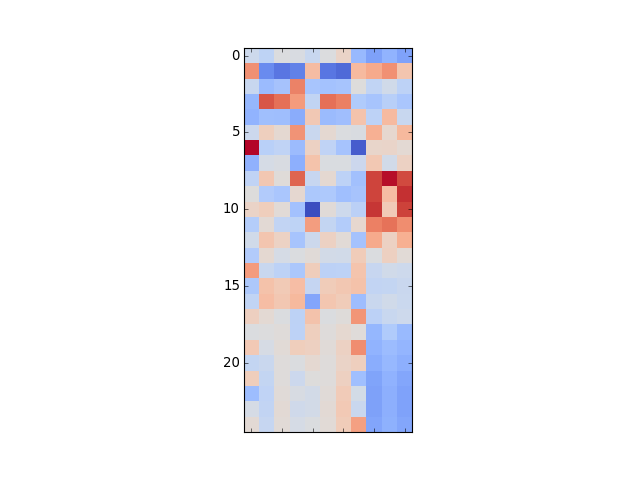

<IPython.core.display.Javascript object>


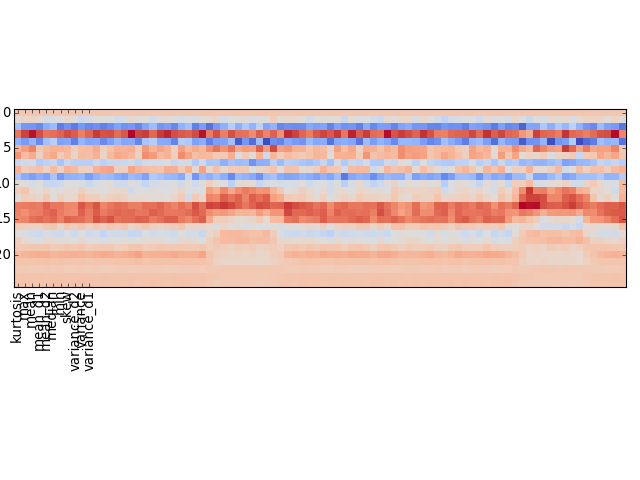

In [12]:
#f, axarr = pylab.subplots(3,1, sharex=True)
pylab.figure()
pylab.imshow(feat1, interpolation='None', cmap='coolwarm')
pylab.gca().set_xticklabels([])

pylab.savefig('/tmp/final/fire_features.png', dpi = 600)

pylab.figure()
pylab.imshow(feat2, interpolation='None', cmap='coolwarm')
pylab.savefig('/tmp/final/maracas_features.png', dpi = 600)
pylab.gca().set_xticklabels([])

fig = pylab.figure()
pylab.imshow(feat3, interpolation='None', cmap='coolwarm')

pylab.gca().set_xticks(range(11))
aticks = [u'kurtosis', u'max', u'mean', u'mean_d1', u'mean_d2', u'median', u'min', u'skew', u'variance_d2', u'variance', u'variance_d1']
#print(df.columns)
pylab.gca().set_xticklabels(aticks)
#pylab.gcf().xticks(rotation=90)
pylab.xticks(rotation=90)
pylab.tight_layout()
#axarr[2].imshow(feat3, interpolation='None', cmap='coolwarm')
pylab.savefig('/tmp/final/bell_features.png', dpi = 600)

pylab.show()

/mnt/protolab_innov/data/sounds/dataset/FireAlarmFr/FireAlarmFr-009-PepperLaurent.wav


<IPython.core.display.Javascript object>


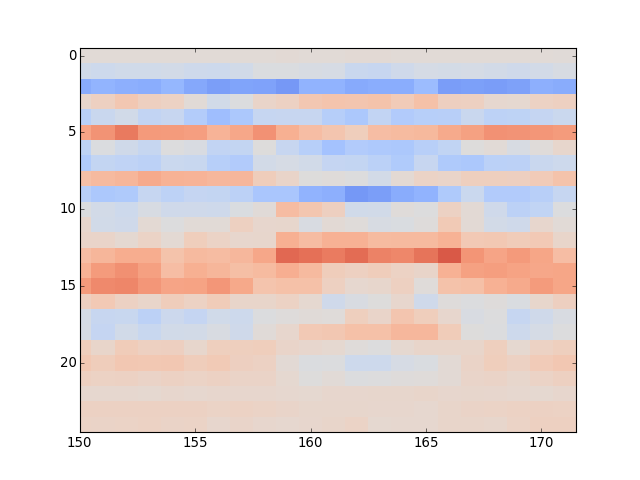

/mnt/protolab_innov/data/sounds/dataset/DeskBell/DeskBell-042-NaoAlex.wav


<IPython.core.display.Javascript object>


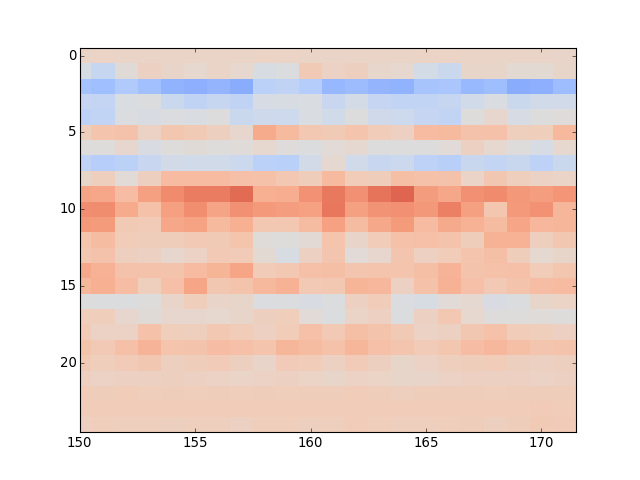

/mnt/protolab_innov/data/sounds/dataset/ToyMaracas/ToyMaracas-009-PepperAlex.wav


<IPython.core.display.Javascript object>


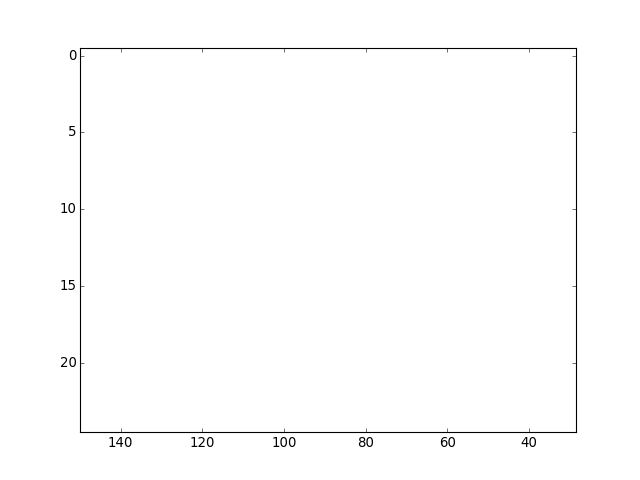

In [135]:
import glob

f = []
for class_name in ["FireAlarmFr", "DeskBell", "ToyMaracas"]:
    for num, filename in enumerate(glob.glob(('/mnt/protolab_innov/data/sounds/dataset/{}/*.wav'.format(class_name)))):
        print filename

        f = test_plot(filename, 'coolwarm')
        pylab.savefig('/tmp/out_{}.png'.format(class_name))
        break
        if num > 4:
            break
    

In [58]:
df = pd.DataFrame(f)
# we need to normalize the columns.. in order.. to get something readeable.. but.. too difficult for now.. later
# fast normalization// not exactly what we want..


pylab.imshow(df.T, interpolation='None')
ax = pylab.gca()
ax.set_yticks(range(len(df.columns)))
ax.set_yticklabels(df.columns)
pylab.show()
#%qtconsole

In [77]:
df.head()

,kurtosis,maximum,mean,mean_first_diff,mean_second_diff,median,minimum,skewness,var_second_diff,variance,variance_first_diff
0,-1.064521,5.922012,1.055179,-0.079947,-0.019055,0.416729,-2.304374,0.485769,0.049661,5.968738,0.051782
1,-0.564947,5.717071,-18.180178,0.409751,-0.066482,-13.023493,-51.661290,-0.775866,202.497776,230.178364,78.929550
2,0.295791,-1.730682,-45.780923,-0.332844,-0.076905,-49.463367,-70.912701,0.967341,143.090648,275.708039,72.909258
3,-0.339888,48.012172,10.178417,-0.312622,-0.065389,10.819227,-23.402603,0.060403,230.609531,237.677285,88.242676
4,-0.332153,4.846199,-10.309404,0.011612,-0.112833,-9.505530,-33.291380,-0.297197,130.598847,60.611865,50.977099


In [84]:
v = df.mean(axis=0)
v

kurtosis                0.032318
maximum                14.162181
mean                   -2.885891
mean_first_diff        -0.029225
mean_second_diff       -0.019204
median                 -2.889697
minimum               -19.710571
skewness                0.069816
var_second_diff        82.139713
variance               71.319423
variance_first_diff    35.349543
dtype: float64

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<IPython.core.display.Javascript object>


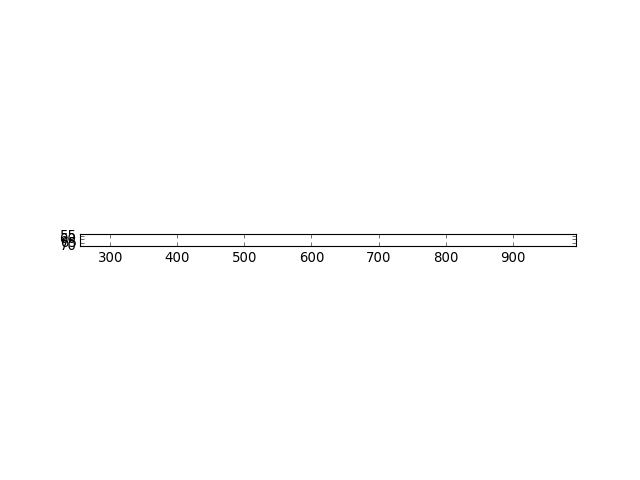

In [94]:
#df_norm = (df - df.mean(axis=1)) / (df.max(axis=1) - df.min(axis=1))
# pnorml = np.sqrt(np.square(df).sum(axis=1))
%pylab notebook
normaliser = df.apply(lambda x: (x - df.mean(axis=0)) / (df.max(axis=0) - df.min(axis=0)), axis=1) # - df.mean(axis=0)
g.head()
pylab.imshow(g.T, interpolation='None')
pylab.show()


## Using full database..


In [4]:
import pickle
with open('/tmp/classif.pickle', 'r') as f:
    obj = pickle.load(f)

In [ ]:
%pylab inline
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(obj._learning_data_X_scaled)
features_proj = pca.transform(obj._learning_data_X_scaled)
y = obj.clf.predict(obj._learning_data_X_scaled)
mask = y =='ToyMaracas'
p =8
pylab.scatter(features_proj[~mask][:,0], features_proj[~mask][:,1], color=['red'])
pylab.scatter(features_proj[mask][:,0], features_proj[mask][:,1], color=['green'])
pylab.show()

In [ ]:
## ce que je veux c'est les mffc par classe/moyenner ??.. bah non en fait c'est pas ce qu'on souhaite..

## normaliser ?  bah non c'est pas ce qu'on souhaite


In [ ]:
aa = 8

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


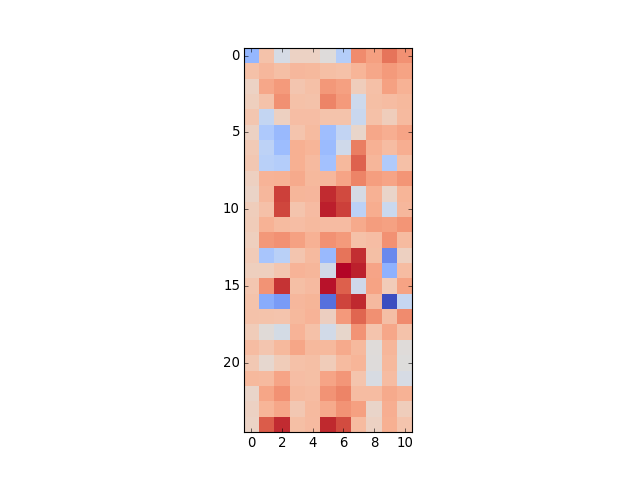

<IPython.core.display.Javascript object>


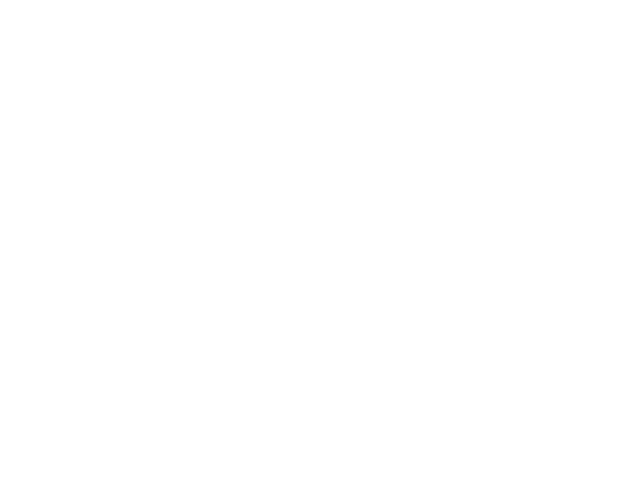

In [138]:
%pylab notebook
# ok go pour les features par classes
mask = np.array((obj.df.expected_class== 'FireAlarmFr').tolist())
#obj._learning_data_X_scaled[~mask].shape
v = obj._learning_data_X_scaled[~mask].mean(axis=0)
#obj.df.features[0]
v = v.reshape((11,25))
u = v.reshape((25, 11))
#v.shape
pylab.imshow(v.T, interpolation='None', cmap='coolwarm')
pylab.figure()
#pylab.imshow(u.T, interpolation='None')
#pylab.show()